# Machine learning
**Dataset `spam`**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

## 1. Importation des données

In [2]:
url = 'https://archive.ics.uci.edu/static/public/94/data.csv'
data = pd.read_csv(url, header=0, sep=',', decimal='.')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 2. Création d'un jeu de données d'apprentissage et de test

In [5]:
target = 'Class'
features = list(data.columns.difference([target]))

X = data[features]
y = data[target]

In [6]:
test_portion = 1/5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_portion, shuffle=True)

print('Dimensions X_train :', X_train.shape)
print('Dimensions y_train :', y_train.shape)
print('Dimensions X_test :', X_test.shape)
print('Dimensions y_test :', y_test.shape)

Dimensions X_train : (3680, 57)
Dimensions y_train : (3680,)
Dimensions X_test : (921, 57)
Dimensions y_test : (921,)


## 3. Normalisation des covariables (si besoin)

In [7]:
mean_std_scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train)

X_train_sc = mean_std_scaler.transform(X_train)
X_test_sc = mean_std_scaler.transform(X_test)

## 4. Modélisation

### 4.1. CART

Avec un "petit" arbre (profondeur maximale de 2) :

Matrice de confusion CART :
 [[548  22]
 [109 242]]
Exactitude CART: 0.86
AUC : 0.83


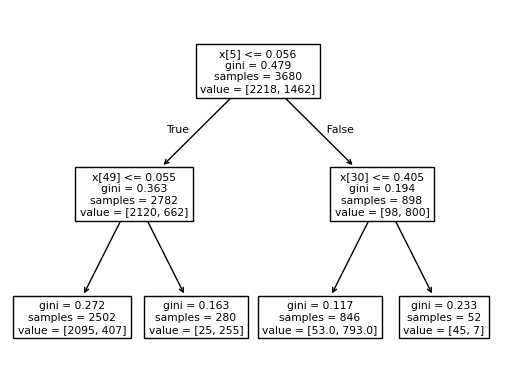

In [8]:
cart_model = DecisionTreeClassifier(max_depth=2)
cart = cart_model.fit(X_train, y_train)

plot_tree(cart)

prob_test_pred_cart = cart.predict(X_test)

confusion_matrix_cart = confusion_matrix(y_test, prob_test_pred_cart)
print('Matrice de confusion CART :\n', confusion_matrix_cart)

accuracy_cart = accuracy_score(y_test, prob_test_pred_cart)
print(f'Exactitude CART: {accuracy_cart:.2f}')

auc_cart = roc_auc_score(y_test, prob_test_pred_cart)
print(f'AUC : {auc_cart:.2f}')

Avec un "grand" arbre :

In [9]:
cart_model = DecisionTreeClassifier()
cart = cart_model.fit(X_train, y_train)

prob_test_pred_cart = cart.predict(X_test)

confusion_matrix_cart = confusion_matrix(y_test, prob_test_pred_cart)
print('Matrice de confusion CART:\n', confusion_matrix_cart)

accuracy_cart = accuracy_score(y_test, prob_test_pred_cart)
print(f'Exactitude CART: {accuracy_cart:.2f}')

auc_cart = roc_auc_score(y_test, prob_test_pred_cart)
print(f'AUC : {auc_cart:.2f}')

Matrice de confusion CART:
 [[528  42]
 [ 36 315]]
Exactitude CART: 0.92
AUC : 0.91


### 4.2 

### 4.3 

### 4.4

### 4.5. Random forest

In [10]:
n_folds = 10

params = {
    'n_estimators': [250, 500, 750, 1000]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=n_folds, n_jobs=-1, verbose=1)
# n_jobs=-1 : pour utiliser tous les core disponibles
# scoring='accuracy' : exactitude
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [250, 500, 750, 1000]},
             scoring='accuracy', verbose=1)

In [11]:
print('Hyperparamètre optimal :', rf_grid.best_params_)

prob_test_pred_rf = rf_grid.predict(X_test)

confusion_matrix_rf = confusion_matrix(y_test, prob_test_pred_rf)
print('Matrice de confusion random forest :\n', confusion_matrix_rf)

accuracy_rf = accuracy_score(y_test, prob_test_pred_rf)
print(f'Exactitude random forest : {accuracy_rf:.2f}')

auc_rf = roc_auc_score(y_test, prob_test_pred_rf)
print(f'AUC random forest : {auc_rf:.2f}')

Hyperparamètre optimal : {'n_estimators': 250}
Matrice de confusion random forest :
 [[554  16]
 [ 25 326]]
Exactitude random forest : 0.96
AUC random forest : 0.95
